In [1]:
#This notebook is a test. Should give same outputs as productivity, but be shorter as I've *successfully* factored the code into scripts.

In [2]:
exec(open("data_prep/subnat_data_import.py").read()) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
from data_prep.subnat_data_clean import *

In [4]:
#Convert apprenticeships into a rate
app_rate = app_completion.merge(app_start, on="AREACD", how='inner')
app_rate['Value'] = app_rate['Value_x']/app_rate['Value_y']
app_rate['Indicator'] = 'Approx apprenticeship completion rate'
app_rate.pop('Value_x')
app_rate = app_rate[['AREACD', 'Indicator', 'Value']]

In [5]:
#Select our groups of metrics
productivity = [gva, high_growth]
pay = [weekly_pay, gdi, employ_rate, neet]
lstandards =[male_hle, female_hle, satisfaction, green_space, inactive]
skills = [gcses, app_rate, maths_5, lit_5, comm_5]


In [6]:
#Define the groups of metrics we have to streamline the processing.
#Do all the cleaning at once.
groups = [productivity, pay, lstandards, skills]
for group in groups:
    group = clean_groups(group)

In [7]:
#Do the clustering.
from cluster_analysis.cluster_functions import *

In [8]:
productivity_wide = metrics_to_table(productivity)
pay_wide = metrics_to_table(pay)
lstandards_wide = metrics_to_table(lstandards)
skills_wide = metrics_to_table(skills)

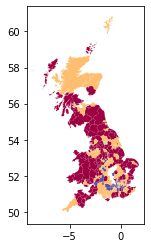

In [9]:
km_model = make_clustering_model()
map = clusters_and_map(metrics_to_table(productivity), km_model)

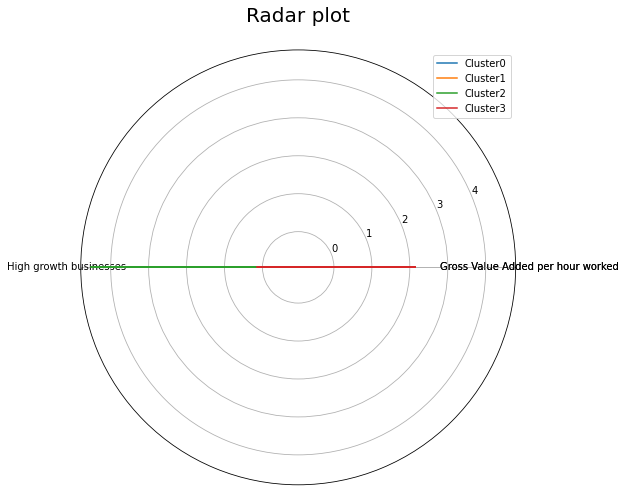

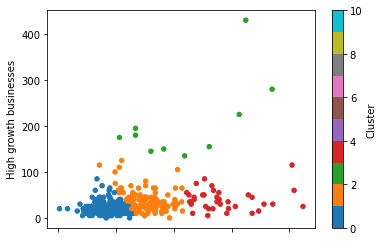

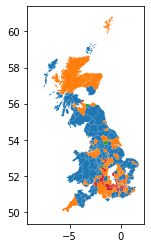

In [10]:
analysis = clusters_and_plots(productivity_wide, km_model)

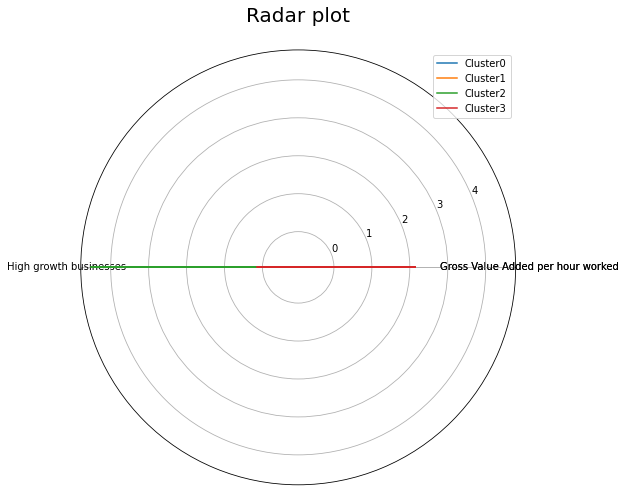

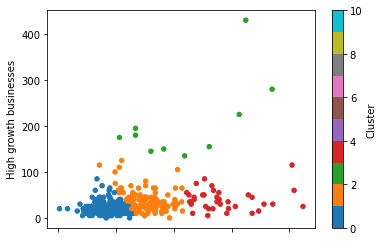

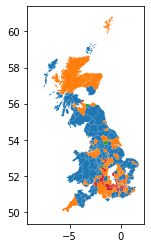

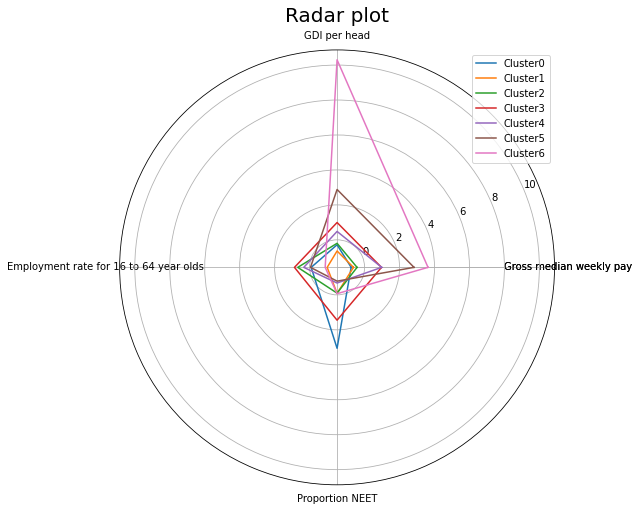

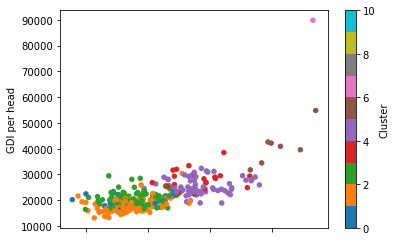

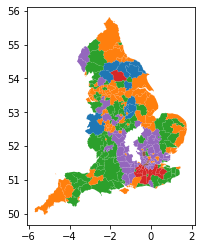

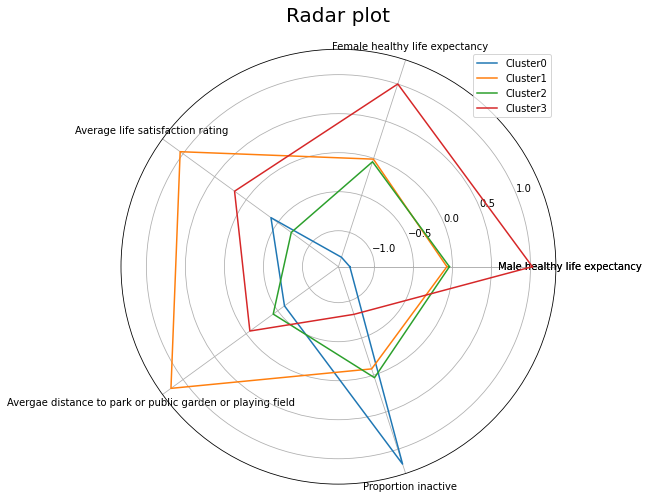

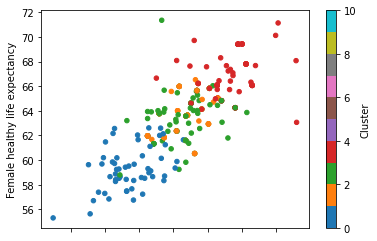

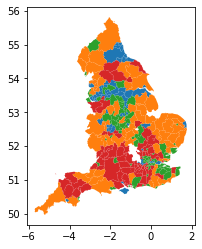

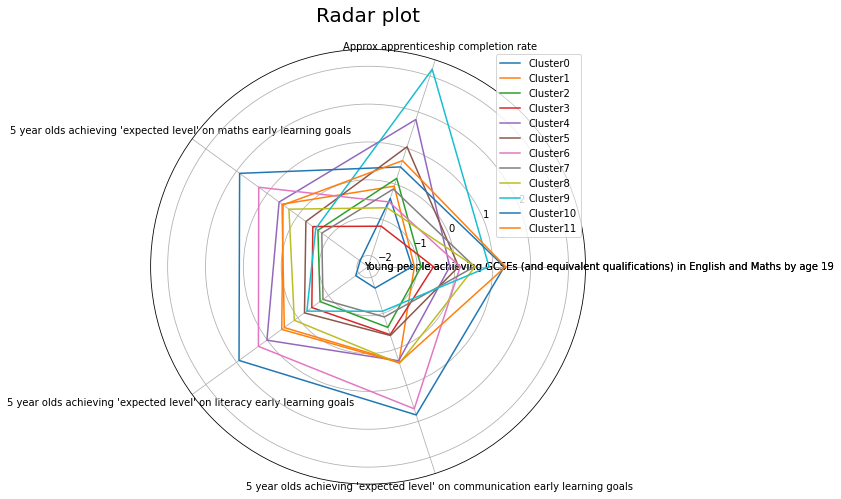

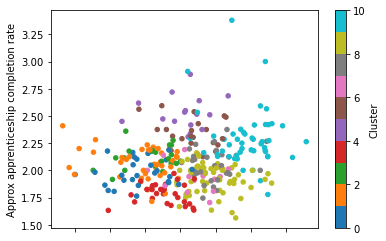

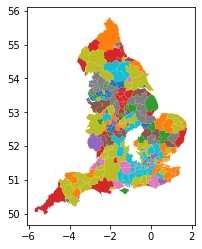

In [11]:
#Transform each group into a 'cluster' version using the basic KMeans model.
prod_cluster = clusters_and_plots(productivity_wide, km_model, show_plots=True)
pay_cluster = clusters_and_plots(pay_wide, km_model, show_plots=True)
lstandards_cluster = clusters_and_plots(lstandards_wide, km_model, show_plots=True)
skills_cluster = clusters_and_plots(skills_wide, km_model, show_plots=True)   


In [12]:
from data_vis.bubble_plots import *
all_clusters = [prod_cluster, pay_cluster, lstandards_cluster, skills_cluster]

#Annoyingly this function only works when declared at main level (not in module due to globals())
def variable_to_name(var):
    """Helper function with takes in a variable and return a string of that variables name.
    If the variable doesn't exist, will return null.
    Might go wrong if there are multiple declared variables with identical values!
    """
    for name in globals():
        if (eval(name) is var) and (not name.startswith("_")): #Omit variables in globals with begin with _, as __ is shorthand for last evaluated result and in jupyter notebooks _1 return output of cell evaluation 1 etc.
            return(name)

labels = [variable_to_name(all_clusters[i]) for i in range(len(all_clusters))]
all_clusters = combine_clusters(all_clusters, labels)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Cluster_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


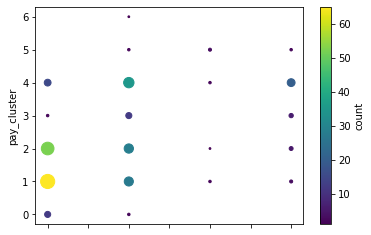

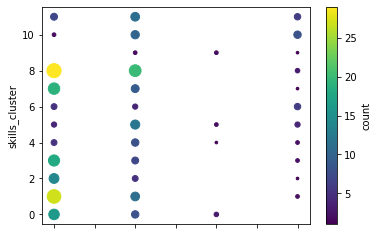

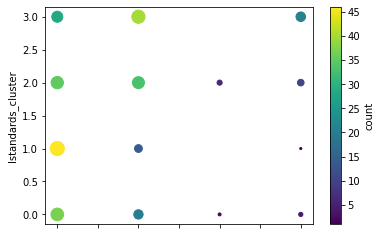

In [13]:
plot_bubbles('prod_cluster', 'pay_cluster', all_clusters)
plot_bubbles('prod_cluster', 'skills_cluster', all_clusters)
plot_bubbles('prod_cluster', 'lstandards_cluster', all_clusters)